In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.linalg as la

from qiskit_nature.second_q.circuit.library import UCCSD, HartreeFock
from qiskit_nature.second_q.algorithms.initial_points import HFInitialPoint
from qiskit_nature.second_q.mappers import ParityMapper, JordanWignerMapper
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver

from qiskit_aer.primitives import Estimator as AerEstimator
from qiskit_aer import noise
from qiskit_ibm_runtime.fake_provider import FakeGuadalupeV2, FakeAthensV2, FakeAthens

# Homemade imports
from qiskit_algorithms import VarQITE, TimeEvolutionProblem, VarQRTE
from qiskit_algorithms.gradients import LinCombEstimatorGradient, LinCombQGT
from qiskit_algorithms.time_evolvers.variational import ImaginaryMcLachlanPrinciple, RealMcLachlanPrinciple
#import qiskit_algorithms.time_evolvers.variational.variational_principles.imaginary_mc_lachlan_principle as mc_lachlan
import qiskit.primitives.utils as utils

from qiskit.primitives import Estimator
from qiskit.primitives import BackendEstimator
from qiskit.circuit.library import EfficientSU2
from qiskit.quantum_info import SparsePauliOp
from qiskit.quantum_info import Statevector

from qiskit_algorithms import SciPyRealEvolver

from qiskit_ibm_runtime import QiskitRuntimeService, Session


In [6]:
# To run on hardware, select the backend with the fewest number of jobs in the queue
service = QiskitRuntimeService(
        channel="ibm_quantum",
        instance="wacqt/partners/varqite",
        token="e6153edfbe304d917d8b0cbcbf1ff74de2b6e5fa05b3172b8f85516af61a49a2b8e7eea96905752f23602be4c9963cfa93cc596d602eab5bb8ab366a3dcb14c1",
    )
backend = service.least_busy(operational=True, simulator=False)

In [2]:
# Hamiltonian reading, TC
data = np.loadtxt('qubit_hamil_h2.txt', dtype=str) # H2, 0.7A sto6g
paulistrings = data[:,0] 
coefficients = (data[:,1])
#coefficients = [np.real(complex(coeff)) for coeff in coefficients]
coefficiencts = [complex(coeff) for coeff in coefficients]
paulis = list(zip(paulistrings, coefficients))
qubit_op = SparsePauliOp.from_list(paulis)
qubit_op = qubit_op.adjoint()
print(qubit_op)

# No TC Hamiltonian
driver = PySCFDriver(
    atom = "H 0 0 0; H 0 0 0.7",
    unit=DistanceUnit.ANGSTROM,
    charge=0,
    spin=0,
    basis='sto6g'
)
problem = driver.run()
h = problem.hamiltonian.second_q_op()

# Mapper
mapper = ParityMapper(num_particles = problem.num_particles)
qubit_op2 = mapper.map(h)
print(qubit_op2)

# Estimator
estimator = 

SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ', 'XY', 'YX', 'XX'],
              coeffs=[-1.09284335-0.j        ,  0.42027207-0.j        , -0.42027207-0.j        ,
 -0.01086588-0.j        ,  0.        -0.06359682j,  0.        +0.06359682j,
  0.1576953 -0.j        ])
SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ', 'XX'],
              coeffs=[-1.05178903+0.j,  0.4209349 +0.j, -0.4209349 +0.j, -0.01159108+0.j,
  0.17928567+0.j])


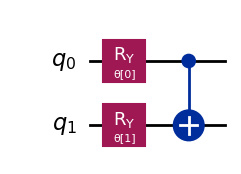

In [4]:
# Ansatz

# UCCSD
ansatz = UCCSD(num_spatial_orbitals = problem.num_spatial_orbitals, num_particles = problem.num_particles, qubit_mapper=mapper) # No initial state! By luck it still works in this case but.
init_param_values = [0,3*np.pi/2,-np.pi/2] # surely there should be some systematic way of doing this...
ansatz.decompose().decompose().draw("mpl")

# EfficientSU2
ansatz = EfficientSU2(num_qubits = qubit_op2.num_qubits, reps=1, su2_gates=["ry"], skip_final_rotation_layer=True)
init_param_values = [np.pi,np.pi]
ansatz.decompose().draw("mpl")


In [5]:
# Testing the initial state
print(ansatz.num_parameters)
state = Statevector.from_int(0, 2**qubit_op.num_qubits)
test_circ = ansatz.assign_parameters(init_param_values)
state = state.evolve(test_circ)
state.draw('latex')

2


<IPython.core.display.Latex object>

In [6]:
###############
### VarQITE ###
###############
# This is the TC Hamiltonian with the modified code.

# The 2 main tunable parameters
total_time=5
num_timesteps = 50

var_principle = ImaginaryMcLachlanPrinciple(qgt=LinCombQGT(estimator), 
                                                       gradient=LinCombEstimatorGradient(estimator), 
                                                       non_hermitian=True)
time_evo = TimeEvolutionProblem(qubit_op, 
                                time=total_time, 
                                aux_operators=[qubit_op])
qite = VarQITE(ansatz, init_param_values, 
               variational_principle = var_principle,
               estimator=estimator, 
               num_timesteps=num_timesteps)
result = qite.evolve(time_evo)

QGT
H+
H-
QGT
H+
H-
QGT
H+
H-
QGT
H+
H-
QGT
H+
H-
QGT
H+
H-
QGT
H+
H-
QGT
H+
H-
QGT
H+
H-
QGT
H+
H-
QGT
H+
H-
QGT
H+
H-
QGT
H+
H-
QGT
H+
H-
QGT
H+
H-
QGT
H+
H-
QGT
H+
H-
QGT
H+
H-
QGT
H+
H-
QGT
H+
H-
QGT
H+
H-
QGT
H+
H-
QGT
H+
H-
QGT
H+
H-
QGT
H+
H-
QGT
H+
H-
QGT
H+
H-
QGT
H+
H-
QGT
H+
H-
QGT
H+
H-
QGT
H+
H-
QGT
H+
H-
QGT
H+
H-
QGT
H+
H-
QGT
H+
H-
QGT
H+
H-
QGT
H+
H-
QGT
H+
H-
QGT
H+
H-
QGT
H+
H-
QGT
H+
H-
QGT
H+
H-
QGT
H+
H-
QGT
H+
H-
QGT
H+
H-
QGT
H+
H-
QGT
H+
H-
QGT
H+
H-
QGT
H+
H-
QGT
H+
H-
QGT
H+
H-


In [11]:
###############
### VarQITE ###
###############
# This is the non-TC Hamiltonian.

# The 2 main tunable parameters
total_time=5
num_timesteps = 50

var_principle = ImaginaryMcLachlanPrinciple(qgt=LinCombQGT(estimator), gradient=LinCombEstimatorGradient(estimator))
time_evo = TimeEvolutionProblem(qubit_op2, 
                                time=total_time, 
                                aux_operators=[qubit_op2])
qite = VarQITE(ansatz, init_param_values, 
               variational_principle = var_principle,
               estimator=estimator, 
               num_timesteps=num_timesteps)
result2 = qite.evolve(time_evo)

QGT
QGT
QGT
QGT
QGT
QGT
QGT
QGT
QGT
QGT
QGT
QGT
QGT
QGT
QGT
QGT
QGT
QGT
QGT
QGT
QGT
QGT
QGT
QGT
QGT
QGT
QGT
QGT
QGT
QGT
QGT
QGT
QGT
QGT
QGT
QGT
QGT
QGT
QGT
QGT
QGT
QGT
QGT
QGT
QGT
QGT
QGT
QGT
QGT
QGT
QGT


In [12]:
data = np.loadtxt("energy_trace_h2.dat")
avqite_times = data[:,0]
avqite_energies = data[:,2]
initial_time=data[0,0]
initial_energy=data[0,2]
#print(f"Initial time: {initial_time}, Initial energy: {initial_energy}")

[-1.89973426]
E0_noisy: -1.922315151004349, E0_noTC: -1.8820677470371823, E0_TC: -1.9225216042673814


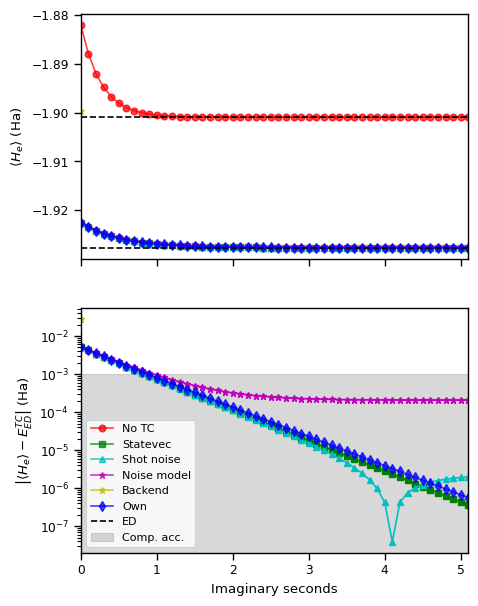

In [13]:
sns.set_context("paper")
fig, axs = plt.subplots(2,1,sharex=True)
fig.set_figheight(7)
fig.set_figwidth(5)
ax = axs[0]
ax2 = axs[1]
#DELTA_BIG = 50
DELTA_BIG = 2
sys = "h2"
e_exact = {"h2": -1.9276748321, "h4": -4.3860854160}
e_exact_notc = {"h2": -1.9009465237, "h4": None} 

h_exp_val = np.array([ele[0][0].real for ele in result.observables])
times = result.times
h_exp_val2 = np.array([ele[0][0].real for ele in result2.observables])
times2 = result2.times


ax.plot(times2, h_exp_val2, '-ro', label= "No TC", alpha=0.75) #+ extracted_transformer_energy+ nuclear_repulsion_energy
ax.plot(times, h_exp_val, '-gs', label= "TC", alpha=0.75) #+ extracted_transformer_energy+ nuclear_repulsion_energy
ax.plot([e_exact[sys]]*(int(times[-1])+15), '--k', label= "ED")
ax.plot([e_exact_notc[sys]]*(int(times[-1])+15), '--k')
ax.set_ylabel(r"$\langle H_e \rangle$ (Ha)")
#ax.legend()
ax.set_xlim([0, times[-1]])

ax2.plot(times, abs(h_exp_val-e_exact[sys]), "-gs", label= "TC")
ax2.plot(times2, abs(h_exp_val2-e_exact_notc[sys]), "-ro", label= "No TC")
ax2.fill_between([0,times[-1]],[1e-3,1e-3],color="grey",alpha=0.3,label="Comp. acc.")
ax2.set_xlabel("Imaginary seconds")
ax2.set_ylabel(r"$\left|\langle H_e \rangle - E_{ED}\right|$ (Ha)")
ax2.set_yscale("log")
ax2.set_xlim([0, times[-1]])

h, l = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
for index, label in enumerate(l2):
    if label not in l:
        l.append(label)
        h.append(h2[index])
ax2.legend(h, l, prop={'size': 8})
